<a href="https://colab.research.google.com/github/alayont-f/differential-equations/blob/main/Solving_differential_equations_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code, we will visualize how the solutions to the differential equation $$y''+y=cos(\omega t)$$ change when $\omega$ changes. In the animation below, you can move the slider to see the effect of changing $\omega$. What do you notice?

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

from ipywidgets import interactive

def anim(omega):
  def f(t,y):
    return [y[1],-y[0]+np.cos(omega*t)]

  ts=[0,150]
  t = np.linspace(ts[0],ts[1],num=50*ts[1]+1)
  y0 = [0,0]
  sol = solve_ivp(f,ts,y0,dense_output=True)

  #create the plot
  width=18
  height=7
  fig, ax = plt.subplots(figsize=(width,height))

  ax.set_xlabel('t')
  ax.set_ylabel('y')
  ax.set_ylim(-20,20)
  ax.grid(True, linewidth=0.2)

  ax.plot(t,sol.sol(t)[0])

  plt.show()

interactive_plot = interactive(anim, omega=(0,2.6,0.01))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(FloatSlider(value=1.3, description='omega', max=2.6, step=0.01), Output(layout=Layout(he…

There is one specific $\omega$ value that we don't have a solution for, yet. Check with Wolfram Alpha about what it says the solution is. Does the graph Python give match the formula WA gives?

Can you think of how to find this solution yourself algebraically?

---

2) We will now consider how to solve a general forced harmonic oscillator and plot its graph for a few different initial values.

In the code below, choose different initial values what kind of different graphs we can obtain. This code is for the equation
$$\frac{d^2y}{dt^2} + 5 \frac{dy}{dt} + 6y = \frac{40}{3}e^{-t}$$

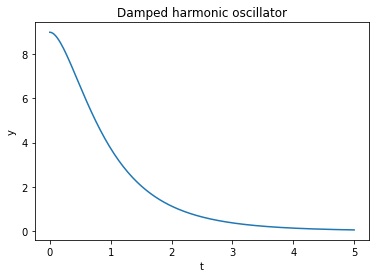

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def f(u,t):
  return (u[1], -5*u[1]-6*u[0]+40/3*np.exp(-t))  
#change differential equation in the above line
#we write the second order equation in system format
#u[1] refers to the newly introduced velocity variable, y'
#u[0] means y. We also write the system as dy/dt, dv/dt 
#so the above system example corresponds to equation
#dv/dt = y'' = -5*y'-6y+40/3 = -5v-6y+40/3

u0=[9,0]    #change initial values in this line to get other solutions
#first number is y(0), the second is y'(0)

ts=np.linspace(0,5,200)
us=odeint(f,u0,ts)
ys=us[:,0]

plt.xlabel("t")
plt.ylabel("y")
plt.title("Damped harmonic oscillator")
plt.plot(ts,ys);


